# Méthode des puissances itérées


## Quotient de Rayleigh
```{index} Rayleigh;quotient de 
```
```{prf:definition}
Pour une matrice symétrique $A$, le *quotient de Rayleigh* est le rapport défini pour tout $x\neq 0$ par :

$\rho_A(x)=\frac{x^\top Ax}{x^\top x}$
```
On vérifie immédiatement que si $x$ est vecteur propre, le quotient de Rayleigh fournit la valeur propre associée : en effet $Ax=\lambda x \Rightarrow x^\top Ax=\lambda x^\top x$.

Si $\lambda_1$ et $\lambda_n$ sont respectivement la plus petite et la plus grande valeur propre de $A$, et $x^1$,$x^n$ les vecteurs propres associés, on a également les résultats suivants :

```{prf:theorem} Théorème min-max de Courant-Fischer
$\begin{align*}
\lambda_1&=\rho_A(x^1)=\displaystyle\min_{x\in \mathbb{R}^n}\{\rho_A(x)\}\\
\lambda_n&=\rho_A(x^n)=\displaystyle\max_{x\in \mathbb{R}^n}\{\rho_A(x)\}
\end{align*}
$

De plus, si les valeurs propres sont rangées dans l'ordre croissant, on a 

$\begin{align*}
\lambda_i&=\displaystyle\min_{S_i}\{\displaystyle\max_{x\in S_i}\{\rho_A(x)\}\}\\
\lambda_i&=\displaystyle\max_{S_{i-1}}\{\displaystyle\min_{x\in S_{i-1}^\bot}\{\rho_A(x)\}\}
\end{align*}$

où $S_i$ est un sous-espace quelconque de dimension $i$.
```

Le sous-espace $S_i$ pour lequel le quotient de Rayleigh est maximum est le sous-espace propre associé aux $i$ premières valeurs propres. Le sous-espace pour lequel il est minimum est orthogonal au sous-espace propre associé aux $i-1$ premières valeurs propres. C'est donc le sous-espace engendré par les $n-i+1$ vecteurs propres associés à $\{\lambda_i\cdots\lambda_n\}$.

## Méthode des puissances itérées

La méthode des puissances itérées permet de calculer le vecteur propre associé à la plus grande valeur propre.

Supposons $A$ symétrique de valeurs propres ordonnées selon $|\lambda_1|\leq\cdots|\lambda_{n-1}|<|\lambda_n|$.

On considère l'itération suivante définie à partir d'un vecteur initial $q_0$ donné, tel que $\|q_0\|=1$, et $q_0$ n'est pas orthogonal à $v^n$, le vecteur propre associé à la plus grande valeur propre isolée $\lambda_n$ :

$\begin{align*}
x_{k+1}&=Aq_k\\
q_{k+1}&=\frac{x_{k+1}}{\|x_{k+1}\|}
\end{align*}$

Par récurrence, on montre alors que  $q_k=\frac{A^kq_0}{\|A^kq_0\|}$ et comme les vecteurs propres $\{v^1\cdots v^n\}$ forment une base de $\mathbb{R}^n$, on peut écrire 

 $q_0=\displaystyle\sum{i=1}^n\alpha_iv^i,\quad\alpha_n\neq 0$
 et 

 $A^kq_0=\alpha_n\lambda_n^k\left (v^n+\displaystyle\sum{i=1}^{n-1}\frac{\alpha_i}{\alpha_n}\left (\frac{\lambda_i}{\lambda_n}\right )^kv^i\right )$

 Lorsque $k\rightarrow\infty$, les rapports $\left (\frac{\lambda_i}{\lambda_n}\right )^k$ tendent vers 0 pour $i\neq n$, 
 ce qui signifie que la suite des itérés $\{q_k\}$ converge vers le vecteur propre $v^n$ ou $-v^n$. 
 On peut montrer de plus que $\|Aq_k\|$ tend vers $|\lambda_n|$ et que la convergence est linéaire de taux $\left |\frac{\lambda_{n-1}}{\lambda_n}\right |$ si $\alpha_{n-1}\neq 0$.

[[ 2.  1. -1.]
 [ 1.  3.  1.]
 [-1.  1.  4.]]
La plus grande valeur propre de A est  0.7856802566224643
3.45876418782198  ---  0
3.6097248219748743  ---  1
3.710765314249763  ---  2
3.7796903074474497  ---  3
3.823842509822556  ---  4


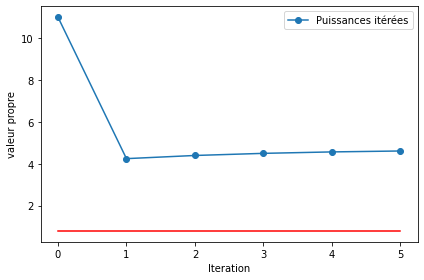

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def puissiter(A,v0,lam,niter=5):
    v = v0
    vv = [v0]
    l = np.dot(v0,np.dot(A,v0))
    ll = [l]
    epsilon = 1e-4
    k=0
    while np.fabs(lam-l)>epsilon and k<niter:
        w = np.dot(A,v)
        v = w/np.linalg.norm(w)
        l = np.dot(v,np.dot(A,v))
        vv.append(v)
        ll.append(l)
        print(np.fabs(lam-l)," --- ",k)
        k=k+1
    return ll, vv

A = np.array([[2.,1,-1],[1,3,1],[-1,1,4]])
print(A)
lam =(np.linalg.eigvals(A)[0])
print("La plus grande valeur propre de A est ",lam)
ll, vv = puissiter(A,np.ones(3),lam)

plt.plot(range(len(ll)),ll,'-o',label='Puissances itérées')
plt.plot(range(len(ll)),lam*np.ones((len(ll)), dtype=np.uint8) ,'r')
plt.ylabel('valeur propre')
plt.xlabel('Iteration');
plt.legend()
plt.tight_layout()




## Méthode des puissances inverses

Pour les mêmes raisons, l'itération 

$\begin{align*}
Ax_{k+1}&=q_k\\
q_{k+1}&=\frac{x_{k+1}}{\|x_{k+1}\|}
\end{align*}$

avec $\|q_0\|=1$, et $q_0$ n'est pas orthogonal à $v^1$, converge vers la direction du vecteur propre associé à la plus 
petite valeur propre en module. On remarquera le coût de calcul en $O(n^2)$.

```{prf:remark}
:class: dropdown
1. Accélération par *décalage* : la matrice $A+\alpha I$ a les mêmes vecteurs propres que $A$ et ses valeurs propres sont décalées de la quantité $\alpha$. La méthode des puissances itérées inverses converge d'autant plus vite que les rapports $\left|\frac{\lambda_1}{\lambda_2}\right|^k$ tendent rapidement vers 0. On a donc intérêt à ce que $\lambda_1$ soit le plus proche possible de 0, et de plus, la méthode sera d'autant plus rapide que l'écart entre les deux plus petites valeurs propres se creuse. La technique du décalage consiste donc à remplacer $A$ par $A+\alpha I$, avec $\alpha\approx -\lambda_1$. Plus l'estimation de $\lambda_1$ sera précise, plus la convergence sera rapide. Toutefois, il faut que $\alpha\neq -\lambda_1$ pour éviter que la matrice ne devienne singulière
2. Technique de *déflation* : la méthode des puissances itérées peut être étendue pour permettre le calcul de toutes les valeurs propres d'une matrice symétrique. Supposons en effet calculée la plus grande valeur propre $\lambda_n$ ainsi qu'un vecteur propre associé $v^n$. Soit $P_n$ la la matrice de projection orthogonale sur l'hyperplan $(v^n)^\bot$. La matrice $P_nA$ possède les mêmes vecteurs propres que $A$ et les mêmes valeurs propres à l'exception de $\lambda_n$ qui est remplacée par 0. L'application de la méthode des puissances itérées à $P_nA$ permettra donc de calculer la deuxième plus grande valeur propre de $A$. Cette technique, dite de déflation, permet théoriquement de calculer toutes les valeurs propres de $A$. Elle est toutefois numériquement instable sans précautions, et on lui préférera généralement la méthode des puissances groupées.
```